## Keras plus TensorFlow
### Installation Instructions
* TensorFlow (not GPU) https://www.tensorflow.org/install/install_windows
* Keras https://keras.io/#installation
### Task: There are diabetics dataset example. Do the same with Iris dataset or your project data


### Codebook
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [6]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("iris.txt", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:4]
Y = dataset[:,4:6]
# create model
model = Sequential()
model.add(Dense(12, input_dim=4, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(2, init='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10,  verbose=2)
# calculate predictions
predictions = model.predict(X)
# round predictions
rounded = [[round(x[0]),round(x[1])] for x in predictions]
print(rounded)

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=4, activation="relu", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  app.launch_new_instance()
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/150
 - 0s - loss: 0.6922 - acc: 0.6467
Epoch 2/150
 - 0s - loss: 0.6901 - acc: 0.6667
Epoch 3/150
 - 0s - loss: 0.6874 - acc: 0.6667
Epoch 4/150
 - 0s - loss: 0.6835 - acc: 0.6667
Epoch 5/150
 - 0s - loss: 0.6776 - acc: 0.6667
Epoch 6/150
 - 0s - loss: 0.6711 - acc: 0.6667
Epoch 7/150
 - 0s - loss: 0.6635 - acc: 0.6667
Epoch 8/150
 - 0s - loss: 0.6566 - acc: 0.6667
Epoch 9/150
 - 0s - loss: 0.6515 - acc: 0.6667
Epoch 10/150
 - 0s - loss: 0.6461 - acc: 0.6667
Epoch 11/150
 - 0s - loss: 0.6411 - acc: 0.6667
Epoch 12/150
 - 0s - loss: 0.6365 - acc: 0.6667
Epoch 13/150
 - 0s - loss: 0.6306 - acc: 0.6667
Epoch 14/150
 - 0s - loss: 0.6227 - acc: 0.6667
Epoch 15/150
 - 0s - loss: 0.6146 - acc: 0.6667
Epoch 16/150
 - 0s - loss: 0.6051 - acc: 0.6667
Epoch 17/150
 - 0s - loss: 0.5942 - acc: 0.6667
Epoch 18/150
 - 0s - loss: 0.5818 - acc: 0.6667
Epoch 19/150
 - 0s - loss: 0.5683 - acc: 0.6700
Epoch 20/150
 - 0s - loss: 0.5551 - acc: 0.6833
Epoch 21/150
 - 0s - loss: 0.5413 - acc: 0.7600
E

In [4]:
d = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for index, x in enumerate(rounded):
    ans = (dataset[index,4:6] == x).all()
    if x == [0,0]:
        if ans:
            d[0][0] += 1;
        elif (dataset[index,4:6] == [0, 1]).all():
            d[0][1] += 1;
        else:
            d[0][2] += 1;
    elif x == [0, 1]:
        if ans:
            d[1][1] += 1;
        elif (dataset[index,4:6] == [0, 0]).all():
            d[1][0] += 1;
        else:
            d[1][2] += 1;
    else:
        if ans:
            d[2][2] += 1;
        elif (dataset[index,4:6] == [0,0]).all():
            d[2][0] += 1;
        else:
            d[2][1] += 1;        
print(d)

[[50, 1, 0], [0, 47, 1], [0, 2, 49]]


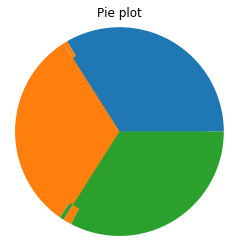

In [7]:
from matplotlib import pyplot as plt
import numpy as np

# vals = np.array([[1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6]])
vals = np.array(d)
fig, ax = plt.subplots()
ax.pie(vals.flatten(), radius=1.2,
       colors=plt.rcParams["axes.prop_cycle"].by_key()["color"][:vals.shape[1]])
ax.pie(vals.sum(axis=1), radius=1)
ax.set(aspect="equal", title='Pie plot')

plt.show()